<a href="https://colab.research.google.com/github/jlsm2/deeplearning/blob/main/cc_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento dos dados

### Download de bibliotecas

In [31]:
!pip install d2l==1.0.3 -q

In [32]:
pip install pandas numpy scikit-learn seaborn matplotlib plotly -q

### Importando bibliotecas

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

### Carregando o dataset

In [34]:
dfTrain = pd.read_csv("fraudTrain.csv")
dfTest = pd.read_csv("fraudTest.csv")

dfTrain

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
1296670  37.7175 -112.4777       258                       Geoscientist   
1296671  39.2667  -77.5101       100   Production assistant, television   
1296672  32.9396 -105.8189       899                    Naval architect   
1296673  43.3526 -102.5411      1126              Volunteer coordinator   
1296674  45.8433 -113.8748       218           Therapist, horticultural   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...                          

### Removendo colunas irrelevantes

In [35]:
dfTrain.info()
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [36]:
dfTrain = dfTrain.drop(columns=["Unnamed: 0", "cc_num", "first", "last", "street", "city", "state", "zip", "dob", "trans_num"])
dfTest = dfTest.drop(columns=["Unnamed: 0", "cc_num", "first", "last", "street", "city", "state", "zip", "dob", "trans_num"])

### Verificando se há valores nulos

In [37]:
print(dfTrain.isnull().sum())
print(dfTest.isnull().sum())

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
gender                   0
lat                      0
long                     0
city_pop                 0
job                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
gender                   0
lat                      0
long                     0
city_pop                 0
job                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


### Convertendo colunas de data

In [38]:
# train dataframe
dfTrain["trans_date_trans_time"] = pd.to_datetime(dfTrain["trans_date_trans_time"])

dfTrain["year"] = dfTrain["trans_date_trans_time"].dt.year
dfTrain["month"] = dfTrain["trans_date_trans_time"].dt.month
dfTrain["day"] = dfTrain["trans_date_trans_time"].dt.day
dfTrain["day_of_week"] = dfTrain["trans_date_trans_time"].dt.dayofweek
dfTrain["hour"] = dfTrain["trans_date_trans_time"].dt.hour

dfTrain.drop(columns=["trans_date_trans_time"], inplace=True)

# test dataframe
dfTest["trans_date_trans_time"] = pd.to_datetime(dfTest["trans_date_trans_time"])

dfTest["year"] = dfTest["trans_date_trans_time"].dt.year
dfTest["month"] = dfTest["trans_date_trans_time"].dt.month
dfTest["day"] = dfTest["trans_date_trans_time"].dt.day
dfTest["day_of_week"] = dfTest["trans_date_trans_time"].dt.dayofweek
dfTest["hour"] = dfTest["trans_date_trans_time"].dt.hour

dfTest.drop(columns=["trans_date_trans_time"], inplace=True)


dfTrain

merchant       category     amt gender  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                       fraud_Lind-Buckridge  entertainment  220.11      M   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                        fraud_Keeling-Crist       misc_pos   41.96      M   
...                                      ...            ...     ...    ...   
1296670                    fraud_Reichel Inc  entertainment   15.56      M   
1296671             fraud_Abernathy and Sons    food_dining   51.70      M   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93      M   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90      M   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30      M   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
1296670  37.7175 -112.4777       258                       Geoscientist   
1296671  39.2667  -77.5101       100   Production assistant, television   
1296672  32.9396 -105.8189       899                    Naval architect   
1296673  43.3526 -102.5411      1126              Volunteer coordinator   
1296674  45.8433 -113.8748       218           Therapist, horticultural   

          unix_time  merch_lat  merch_long  is_fraud  year  month  day  \
0        1325376018  36.011293  -82.048315         0  2019      1    1   
1        1325376044  49.159047 -118.186462         0  2019      1    1   
2        1325376051  43.150704 -112.154481         0  2019      1    1   
3        1325376076  47.034331 -112.561071         0  2019      1    1   
4        1325376186  38.674999  -78.632459         0  2019      1    1   
...             ...        ...         ...       ...   ...    ...  ...   
1296670  1371816728  36.841266 -111.690765         0  2020      6   21   
1296671  1371816739  38.906881  -78.246528         0  2020      6   21   
1296672  1371816752  33.619513 -105.130529         0  2020      6   21   
1296673  1371816816  42.788940 -103.241160         0  2020      6   21   
1296674  1371816817  46.565983 -114.186110         0  2020      6   21   

         day_of_week  hour  
0                  1     0  
1                  1     0  
2                  1     0  
3                  1     0  
4                  1     0  
...              ...   ...  
1296670            6    12  
1296671            6    12  
1296672            6    12  
1296673            6    12  
1296674            6    12  

[1296675 rows x 17 columns]

### Identificando e tratando variáveis categoricas

In [39]:
categorical_cols = dfTrain.select_dtypes(include=["object", "category"]).columns
print(categorical_cols)

Index(['merchant', 'category', 'gender', 'job'], dtype='object')


In [40]:
dfTrain["merchant"] = dfTrain["merchant"].astype("category")
dfTrain["category"] = dfTrain["category"].astype("category")
dfTrain["gender"] = dfTrain["gender"].astype("category")
dfTrain["job"] = dfTrain["job"].astype("category")

dfTest["merchant"] = dfTest["merchant"].astype("category")
dfTest["category"] = dfTest["category"].astype("category")
dfTest["gender"] = dfTest["gender"].astype("category")
dfTest["job"] = dfTest["job"].astype("category")

In [41]:
dfTrain.info()
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   merchant     1296675 non-null  category
 1   category     1296675 non-null  category
 2   amt          1296675 non-null  float64 
 3   gender       1296675 non-null  category
 4   lat          1296675 non-null  float64 
 5   long         1296675 non-null  float64 
 6   city_pop     1296675 non-null  int64   
 7   job          1296675 non-null  category
 8   unix_time    1296675 non-null  int64   
 9   merch_lat    1296675 non-null  float64 
 10  merch_long   1296675 non-null  float64 
 11  is_fraud     1296675 non-null  int64   
 12  year         1296675 non-null  int32   
 13  month        1296675 non-null  int32   
 14  day          1296675 non-null  int32   
 15  day_of_week  1296675 non-null  int32   
 16  hour         1296675 non-null  int32   
dtypes: category(4), float64(5),

In [42]:
# label encoder
le = LabelEncoder()

dfTrain["merchant"] = le.fit_transform(dfTrain["merchant"])
dfTrain["job"] = le.fit_transform(dfTrain["job"])

dfTest["merchant"] = le.fit_transform(dfTest["merchant"])
dfTest["job"] = le.fit_transform(dfTest["job"])

# one-hot encoding
dfTrain = pd.get_dummies(dfTrain, columns=["category", "gender"], drop_first=True)

dfTest = pd.get_dummies(dfTest, columns=["category", "gender"], drop_first=True)

In [43]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   merchant                 1296675 non-null  int64  
 1   amt                      1296675 non-null  float64
 2   lat                      1296675 non-null  float64
 3   long                     1296675 non-null  float64
 4   city_pop                 1296675 non-null  int64  
 5   job                      1296675 non-null  int64  
 6   unix_time                1296675 non-null  int64  
 7   merch_lat                1296675 non-null  float64
 8   merch_long               1296675 non-null  float64
 9   is_fraud                 1296675 non-null  int64  
 10  year                     1296675 non-null  int32  
 11  month                    1296675 non-null  int32  
 12  day                      1296675 non-null  int32  
 13  day_of_week              1296675 non-null 

### Balanceando os casos de fraude

In [44]:
graph = px.histogram(dfTrain, x="is_fraud")

graph.show()

In [45]:
X = dfTrain.drop("is_fraud", axis=1)
y = dfTrain["is_fraud"]

smote = SMOTE(random_state=42)
XTrain_resampled, ytrain_resampled = smote.fit_resample(X, y)

X = dfTest.drop("is_fraud", axis=1)
y = dfTest["is_fraud"]

smote = SMOTE(random_state=42)
XTest_resampled, ytest_resampled = smote.fit_resample(X, y)

In [46]:
graph = px.histogram(ytrain_resampled, x="is_fraud")

graph.show()

### Padronizando features numéricas

In [47]:
numeric_features = ["amt", "lat", "long", "city_pop", "unix_time", "year", "month", "day", "day_of_week", "hour"]

scaler = StandardScaler()

XTrain_resampled[numeric_features] = scaler.fit_transform(XTrain_resampled[numeric_features])
XTest_resampled[numeric_features] = scaler.fit_transform(XTest_resampled[numeric_features])

In [48]:
XTrain_resampled

merchant       amt       lat      long  city_pop  job  unix_time  \
0             514 -0.850969 -0.514053  0.663158 -0.284145  370  -1.756969   
1             241 -0.557758  2.075975 -2.083681 -0.294803  428  -1.756967   
2             390 -0.234096  0.719795 -1.642457 -0.282046  307  -1.756967   
3             360 -0.736191  1.538679 -1.631465 -0.289101  328  -1.756965   
4             297 -0.744907 -0.040512  0.790382 -0.294962  116  -1.756957   
...           ...       ...       ...       ...       ...  ...        ...   
2578333       288  1.045421 -0.249788  0.934240 -0.156529  178   0.813738   
2578334       195  0.956285 -1.320340  0.469260 -0.271642  340   1.110837   
2578335        53  0.750321 -0.073289  0.868672 -0.264013  121   0.865238   
2578336       400  1.771994  0.422494  1.194378  4.729279  335   0.028863   
2578337       465  0.939843  0.833129  1.175534 -0.179337  236   1.415373   

         merch_lat  merch_long      year  ...  category_health_fitness  \
0        36.011293  -82.048315 -0.647541  ...                    False   
1        49.159047 -118.186462 -0.647541  ...                    False   
2        43.150704 -112.154481 -0.647541  ...                    False   
3        47.034331 -112.561071 -0.647541  ...                    False   
4        38.674999  -78.632459 -0.647541  ...                    False   
...            ...         ...       ...  ...                      ...   
2578333  37.580786  -77.569662  1.544303  ...                    False   
2578334  32.265167  -83.317860  1.544303  ...                    False   
2578335  38.381692  -78.462906  1.544303  ...                    False   
2578336  40.460528  -74.689154 -0.647541  ...                    False   
2578337  43.397917  -74.328192  1.544303  ...                    False   

         category_home  category_kids_pets  category_misc_net  \
0                False               False               True   
1                False               False              False   
2                False               False              False   
3                False               False              False   
4                False               False              False   
...                ...                 ...                ...   
2578333          False               False              False   
2578334          False               False              False   
2578335          False               False              False   
2578336          False               False              False   
2578337          False               False              False   

         category_misc_pos  category_personal_care  category_shopping_net  \
0                    False                   False                  False   
1                    False                   False                  False   
2                    False                   False                  False   
3                    False                   False                  False   
4                     True                   False                  False   
...                    ...                     ...                    ...   
2578333              False                   False                   True   
2578334               True                   False                   True   
2578335              False                   False                   True   
2578336              False                   False                   True   
2578337              False                   False                  False   

         category_shopping_pos  category_travel  gender_M  
0                        False            False     False  
1                        False            False     False  
2                        False            False      True  
3                        False            False      True  
4                        False            False      True  
...                        ...              ...       ...  
2578333                  False            False     False  
2578334  

In [49]:
XTest_resampled

merchant       amt       lat      long  city_pop  job  unix_time  \
0             319 -0.856882 -0.994850  0.702650  0.975107  275  -1.693073   
1             591 -0.779516  0.306099 -1.503818 -0.288190  392  -1.693071   
2             611 -0.746711  0.378201  1.256053 -0.158544  259  -1.693067   
3             222 -0.692887 -2.099555  0.711356 -0.081688  407  -1.693063   
4             292 -0.855936  1.111096  0.397378 -0.285065  196  -1.693062   
...           ...       ...       ...       ...       ...  ...        ...   
1107143       288  0.908924 -0.082867  0.812792 -0.288959  110  -1.176141   
1107144       278  0.811283  2.048689 -1.351245 -0.288607  197   0.143170   
1107145       290 -0.787737  0.837390  1.110950 -0.281919  352   0.689254   
1107146       345 -0.392165  0.751609  0.526465 -0.001828  148  -0.032501   
1107147       313  1.645889 -0.797521  0.399509 -0.289054  320   0.247912   

         merch_lat  merch_long  year  ...  category_health_fitness  \
0        33.986391  -81.200714   0.0  ...                    False   
1        39.450498 -109.960431   0.0  ...                    False   
2        40.495810  -74.196111   0.0  ...                     True   
3        28.812398  -80.883061   0.0  ...                    False   
4        44.959148  -85.884734   0.0  ...                    False   
...            ...         ...   ...  ...                      ...   
1107143  38.747778  -79.242201   0.0  ...                    False   
1107144  48.183538 -108.058689   0.0  ...                    False   
1107145  42.692153  -75.784868   0.0  ...                    False   
1107146  42.170110  -83.358571   0.0  ...                    False   
1107147  35.435605  -84.831625   0.0  ...                    False   

         category_home  category_kids_pets  category_misc_net  \
0                False               False              False   
1                False               False              False   
2                False               False              False   
3                False               False              False   
4                False               False              False   
...                ...                 ...                ...   
1107143          False               False               True   
1107144          False               False               True   
1107145          False               False              False   
1107146          False               False              False   
1107147          False               False               True   

         category_misc_pos  category_personal_care  category_shopping_net  \
0                    False                    True                  False   
1                    False                    True                  False   
2                    False                   False                  False   
3                     True                   False                  False   
4                    False                   False                  False   
...                    ...                     ...                    ...   
1107143              False                    True                  False   
1107144               True                   False                  False   
1107145              False                   False                   True   
1107146               True                   False                  False   
1107147              False                   False                   True   

         category_shopping_pos  category_travel  gender_M  
0                        False            False      True  
1                        False            False     False  
2                        False            False     False  
3                        False            False      True  
4                        False             True      True  
...                        ...              ...       ...  
1107143                  False            False      True  
1107144                  False            False      True

### Identificando e tratando outliers


In [50]:
# train

# identificação dos outliers
Q1 = XTrain_resampled["amt"].quantile(0.25)
Q3 = XTrain_resampled["amt"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = XTrain_resampled[(XTrain_resampled["amt"] < lower_bound) | (XTrain_resampled["amt"] > upper_bound)]

# remoção
XTrain_resampled_cleaned = XTrain_resampled[(XTrain_resampled["amt"] >= lower_bound) & (XTrain_resampled["amt"] <= upper_bound)]

# substituicao de valores
XTrain_resampled["amt"] = np.where(XTrain_resampled["amt"] < lower_bound, lower_bound, XTrain_resampled["amt"])
XTrain_resampled["amt"] = np.where(XTrain_resampled["amt"] > upper_bound, upper_bound, XTrain_resampled["amt"])

# transformação de dados
XTrain_resampled["amt"] = np.log(XTrain_resampled["amt"] + 1)  # somar 1 para evitar log(0)

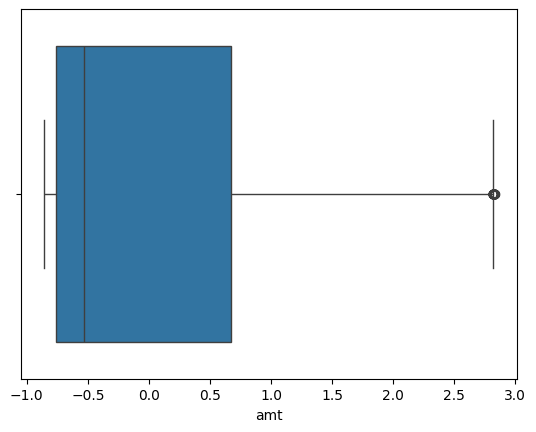

In [51]:
sns.boxplot(x=XTrain_resampled_cleaned["amt"])
plt.show()

In [52]:
# test

# identificação dos outliers
Q1 = XTest_resampled["amt"].quantile(0.25)
Q3 = XTest_resampled["amt"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = XTest_resampled[(XTest_resampled["amt"] < lower_bound) | (XTest_resampled["amt"] > upper_bound)]

# remoção
XTest_resampled_cleaned = XTest_resampled[(XTest_resampled["amt"] >= lower_bound) & (XTest_resampled["amt"] <= upper_bound)]

# substituicao de valores
XTest_resampled["amt"] = np.where(XTest_resampled["amt"] < lower_bound, lower_bound, XTest_resampled["amt"])
XTest_resampled["amt"] = np.where(XTest_resampled["amt"] > upper_bound, upper_bound, XTest_resampled["amt"])

# transformação de dados
XTest_resampled["amt"] = np.log(XTest_resampled["amt"] + 1)  # somar 1 para evitar log(0)

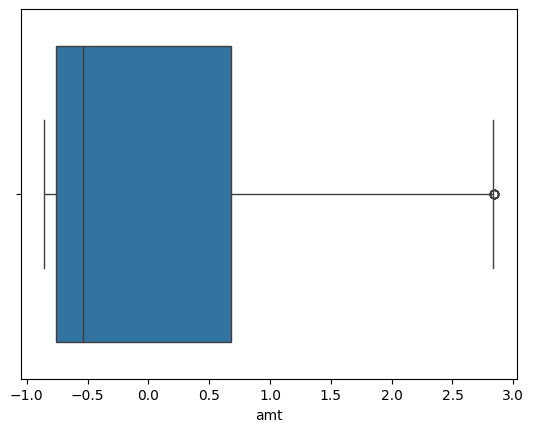

In [53]:
sns.boxplot(x=XTest_resampled_cleaned["amt"])
plt.show()

### Divisão dos dados

In [54]:
X_train = XTrain_resampled
y_train = ytrain_resampled

X_test = XTest_resampled
y_test = ytest_resampled

# Criação e treinamento dos modelos

### Random Forest

In [55]:
estimators = [2, 5, 10, 20, 50]

for n in estimators:
  rf = RandomForestClassifier(n_estimators=n, random_state=42)
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)

  print(f"Acurácia[{n} estimators]: {accuracy_score(y_test, y_pred)}")

KeyboardInterrupt: 

### LSTM

In [61]:
for column in X_train.columns:
  if X_train[column].dtype == "bool":
    X_train[column] = X_train[column].astype(int)

for column in X_test.columns:
  if X_test[column].dtype == "bool":
    X_test[column] = X_test[column].astype(int)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

X_train.info()
X_test.info()
y_train.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2578338 entries, 0 to 2578337
Data columns (total 28 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   merchant                 int64  
 1   amt                      float64
 2   lat                      float64
 3   long                     float64
 4   city_pop                 float64
 5   job                      int64  
 6   unix_time                float64
 7   merch_lat                float64
 8   merch_long               float64
 9   year                     float64
 10  month                    float64
 11  day                      float64
 12  day_of_week              float64
 13  hour                     float64
 14  category_food_dining     int64  
 15  category_gas_transport   int64  
 16  category_grocery_net     int64  
 17  category_grocery_pos     int64  
 18  category_health_fitness  int64  
 19  category_home            int64  
 20  category_kids_pets       int64  
 21  category

In [62]:
# redimensionando os dados
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [63]:
# criando o modelo
class LSTM(nn.Module):
    def __init__(self, input_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, 64, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return self.sigmoid(out)

input_size = X_train.shape[2]
model = LSTM(input_size)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1



In [64]:
# treinamento
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def calculate_accuracy(outputs, labels):
    predicted = (outputs > 0.5).float()
    correct = (predicted == labels).float()
    return correct.sum() / len(correct)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_accuracy = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_accuracy += calculate_accuracy(outputs, labels).item()

    avg_loss = running_loss / len(train_loader)
    avg_accuracy = running_accuracy / len(train_loader)
    print(f'Época [{epoch + 1}/{num_epochs}], Perda: {avg_loss:.4f}, Acurácia: {avg_accuracy}')

Época [1/10], Perda: 0.0977, Acurácia: 0.9679956924865898
Época [2/10], Perda: 0.0555, Acurácia: 0.9826805172884553
Época [3/10], Perda: 0.0487, Acurácia: 0.984667433042917
Época [4/10], Perda: 0.0508, Acurácia: 0.9837696695329534


KeyboardInterrupt: 